In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import re

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

In [38]:
MASK_CHAR = u"\u2047"
full_data = open('data/comment_data/test_data.txt').readlines()

In [39]:
len(full_data)

61328

In [40]:
lengths = []
for line in full_data:
    lengths.append(len(line))

In [41]:
full_data[163]

'c4 Nf6 g3 g6 Bg2 Bg7 Nf3 O-O O-O c5 Nc3 Nc6 d4 d5 dxc5 dxc4 Qa4 ⁇he moves to recapture his pawn . i could have just followed the symmetry with qa5 here . gameknot computer suggests ..... nd5 10 . qxc4 nxc3 11. bxc3 be6 12 . qh4 h5 13 . bb2 qa5 14 . nd4 qxc5 15 . nxe6 fxe6 16 . bxc6 bxc6 17 . rad1 but ....⁇\n'

(array([1.8596e+04, 2.2756e+04, 1.1522e+04, 4.6390e+03, 1.8590e+03,
        8.5600e+02, 4.2700e+02, 2.2200e+02, 1.3100e+02, 9.8000e+01,
        6.4000e+01, 2.7000e+01, 2.0000e+01, 1.9000e+01, 2.2000e+01,
        1.4000e+01, 8.0000e+00, 7.0000e+00, 2.0000e+00, 6.0000e+00,
        4.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.4000e+01, 5.0000e+00]),
 array([   6. ,  114.1,  222.2,  330.3,  438.4,  546.5,  654.6,  762.7,
         870.8,  978.9, 1087. , 1195.1, 1303.2, 1411.3, 1519.4, 1627.5,
        1735.6, 1843.7, 1951.8, 2059.9, 2168. , 2276.1, 2384.2, 2492.3,
        2600.4, 2708.5, 2816.6, 2924.7, 3032.8, 3140.9, 3249. ]),
 <BarContainer object of 30 artists>)

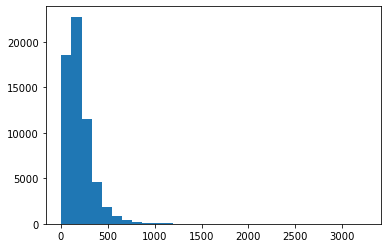

In [42]:
plt.hist(lengths, bins=30)

In [43]:
len(lengths)

61328

In [44]:
kept = []
kept_lengths = []
for line in full_data:
    if len(line) <= 512 and len(line) > 1:
        kept.append(line)
        kept_lengths.append(len(line))

(array([ 444., 1702., 2685., 3501., 4176., 4274., 4306., 3939., 3943.,
        3567., 3390., 3118., 2801., 2486., 1997., 1884., 1635., 1442.,
        1282., 1137.,  927.,  757.,  650.,  630.,  517.,  467.,  389.,
         326.,  321.,  258.]),
 array([  6.        ,  22.86666667,  39.73333333,  56.6       ,
         73.46666667,  90.33333333, 107.2       , 124.06666667,
        140.93333333, 157.8       , 174.66666667, 191.53333333,
        208.4       , 225.26666667, 242.13333333, 259.        ,
        275.86666667, 292.73333333, 309.6       , 326.46666667,
        343.33333333, 360.2       , 377.06666667, 393.93333333,
        410.8       , 427.66666667, 444.53333333, 461.4       ,
        478.26666667, 495.13333333, 512.        ]),
 <BarContainer object of 30 artists>)

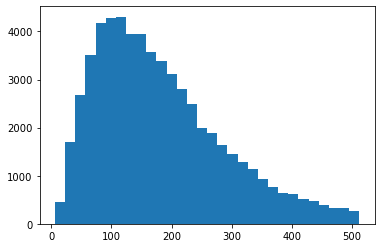

In [45]:
plt.hist(kept_lengths, bins=30)

In [47]:
len(kept)

58951

In [46]:
final = []
# IMPORTANT: Removes multilingual examples and bad examples (such as those that are something like "./??.??")
for line in tqdm.tqdm(kept):
    commentary = line.split(MASK_CHAR)[1]
    try:
        cur = detect(commentary)
        if cur == 'en':
            final.append(line)
    except:
        pass

100%|██████████| 58951/58951 [07:09<00:00, 137.14it/s]


In [48]:
len(final)

51158

In [49]:
final_sentences = []
for n, line in enumerate(final):
    output_line = re.sub(r' \.', '.', line)
    output_line = re.sub(r' \,', ',', output_line)
    output_line = re.sub(r" \'", "\'", output_line)
    final_sentences.append(output_line)

In [50]:
finished = ('').join(final_sentences)
with open('data/comment_data/test_clean.txt', 'w') as f:
    f.write(finished)

In [183]:
lang = []
for line in tqdm.tqdm(kept[:500]):
    commentary = line.split(MASK_CHAR)[1]
    try:
        cur = detect(commentary)
        lang.append(cur)
    except:
        lang.append('BAD')

100%|██████████| 500/500 [00:02<00:00, 186.12it/s]


In [186]:
for i in range(50):
    commentary = kept[i].split(MASK_CHAR)[1]
    print(commentary, lang[i])

. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
non ho un gioco irruento, pertanto cerco di non uscire molto dagli schemi dell ' est-indiana. d'altronde questa mossa ? stata giocata da kasparov e, per certi campioni, ho il massimo del rispetto anche se, in verit ?, ero tentato di giocare subito h6 per fermare le brutte intenzioni del cavallo di donna. mi aspetto d5 da parte del mio avversario che non penso sia intenzionato ad abbattere il centro che si ? costruito. it
mi ero preparato un commento per d5 del bianco, ma ho dovuto gettare tutto. it
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
il mio cavallino, come da stefano supposto, va in f2. un consiglio disinteressato, te1 da parte del bianco sarebbe un nuovo grave errore. infatti dopo : 22. td1 cf2 23. te1 ag2 24. tf1 axc3 25. txf2 td8 it
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
. BAD
la fase di bonaccia continua. ora ? il momento di costruire lo schieramento per un finale nel quale, il mio alfiere in pi ? in pi ? de